In [1]:
from cgi_decode import cgi_decode
from poly_fuzzer.common.abstract_executor import AbstractExecutor
from poly_fuzzer.fuzzers.random_fuzzer import RandomFuzzer 
from poly_fuzzer.fuzzers.mutation_fuzzer import MutationFuzzer
from poly_fuzzer.common.abstract_seed import AbstractSeed
from poly_fuzzer.power_schedules.abstract_power_schedule import AbstractPowerSchedule
from poly_fuzzer.common.abstract_grammar import AbstractGrammar
from urllib.parse import urlparse
from html.parser import HTMLParser

### Generating random string with Random fuzzer for cgi_decode
Here is an example of how you can use the Random fuzzer to generate random strings for the cgi_decode function.
We only need to specify the executor object (the module to calculate the coverage of the program as it is being executed) to initialize the random fuzzer. Inside Random fuzzer we need to implement two functions: ```generate_input``` and ```_update```. We leave the ```_update``` function empty as we don't need to update the fuzzer based on the achieved coverage.

In [2]:
def test_cgi_decode(test_module):
    executor = AbstractExecutor(test_module)
    fuzzer = RandomFuzzer(executor)
    output = fuzzer.run_fuzzer(budget=10)  # Example time budget of 10 inputs
    assert output is not None
    print(output)

test_cgi_decode(cgi_decode) 

{'coverage': [35, 35, 37, 37, 37, 37, 37, 37, 37, 37], 'inputs': ["dP?H%-E_|)b9)a5aTeW'Z|p$t$0~9kP*fBC9&O?.c$#hw}=M(yViC(F7C]$<]T%4)}2%I185CpkJr+PzY}V\\`KUG_?C%)Dj{\\?j_", "$<%FVn1ET<VQ6g`1,bgNmH;[QNf):T|jH(%0mZGrib9T,:YbRu+E?0{sMpd9^1#``~k;2y%F>6j9z76f%T'h_DiX,y%@B|Z", '6iC{.~UvbQL,\\:U>M<=dIp"YuFNe;X<76m88xRz+V^oh[c\\~vM^SHKd0}Q31xA.*"6|:^@Ny:=8y5c98~4t!v=k4Loy', '+WK.{d^O-NSX\\FirxTTcO?nVYBGe&C6^6R":)GD7em=9U)exy;kb_iGs{%w:IKnG<ht+!VOF30@gm-IMBTTxz_XDmWq', '^hQ&V*CM&H?_L:|q@ZV.Zj"pNeB7~B@;ou;6s{F6b^w-a07FERcn_P-@HeS6+({Kk,W5R\\2bUh%lpZ.tfR\'2a):j^fh50', 'A}ban2rokv<yYAl~\'[1;c.(0$n)<1F!"(3xI~sR[|b2bW\\0kn},.I|lpGusvr*z/4aDAwg`b=4$+h*xy}llg%_W8SMi', 'zTB_:s~taiFOaQ{o~%d.c>IcZ*RT()P$2ysaq`-mgtC=c4V/xTqeH.>x"n2B]9i)@2F|3m]%L:l;0c"o~r>d`_)pW#z=|ixCkY!', "A|H3GHhl[#Q6lKif.+(J{|\\_^SaIYt9MN$76JWlitX7k&>=m:BifJQ/Pu(v)VPyNbTpMi#~#u!qCsAzYWD4!~zeGsNz'&^w{z%", '$lj>H(emMw!YH1>mHZLB~"0iu/2\'IFxJ+|xJ`DwptE*~D`W8k67LyK|d-ZWxhNGJu3LMM#Jp}J\'z|C|z0UA1P*3o24\\:j', '|IkU,W]jzu>$QLCEOx6"wk$VuS]MWVI<@

You should observe the ouput of the fuzzer after 10 generated inputs. The output includes such information as the number of covered lines achieved by each input, the relative coverage achieved, the inputs used, the time taken to generate the inputs, and the number of exceptions raised during the generation of the inputs.

### Generating random urls with Mutation fuzzer for the ```urllib.parse.urlparse``` module
Here is an example of how you can use the Mutation fuzzer to generate random urls for the ```urllib.parse.urlparse``` module. The mutation fuzzer requires the executor object as well as the Seed objects to be initialized. The seeds are then modified with random mutations to generate new inputs. The mutation fuzzer also requires the ```_update``` function to be implemented. This function is used to update the fuzzer based on the coverage achieved by the inputs.

In [3]:
def test_fuzzer(test_module):
    executor = AbstractExecutor(test_module)
    seeds = [AbstractSeed("www.google.com"), AbstractSeed("www.polymtl.ca")]
    fuzzer = MutationFuzzer(executor, seeds)

    output = fuzzer.run_fuzzer(budget=10)  # Example time budget of 5 seconds
    
    assert output is not None
    print(output)

test_fuzzer(urlparse)

{'coverage': [36, 36, 40, 41, 41, 41, 41, 41, 41, 41], 'inputs': ['www.google.com', 'www.polymtl.ca', 'wwqJ;olymtl.a', 'wwqJ;olymtl.a', 'wwqJ;olymtl.a', 'wwuJo0ms.', 'wqpQlyml', 'w(1oMe(o', 'Nf$lgowom', 'wr.googl.oo'], 'execution_times': [0.010927200317382812, 0.005215167999267578, 0.0055921077728271484, 0.0023987293243408203, 0.002232789993286133, 0.0036487579345703125, 0.003245830535888672, 0.003288745880126953, 0.003406524658203125, 0.0036351680755615234], 'exceptions': 0}


Here an example of adding a power schedule to the mutation fuzzer is also shown. The power schedule is used to prioritize the inputs that achieve higher coverage. In the current example this schedule assigns equal weights to all the seeds. You should implement a power schedule that considers the size of the inputs, their execution time, and achieved coverage to prioritize the inputs (combine coverage with one more criteria).

In [4]:
def test_fuzzer(test_module):
    executor = AbstractExecutor(test_module)
    powerschedule = AbstractPowerSchedule()
    seeds = [AbstractSeed("www.google.com"), AbstractSeed("www.polymtl.ca")]
    fuzzer = MutationFuzzer(executor, seeds, powerschedule)

    output = fuzzer.run_fuzzer(budget=10)  # Example time budget of 5 seconds
    
    assert output is not None
    print(output)

test_fuzzer(urlparse)

{'coverage': [24, 24, 37, 37, 37, 37, 37, 37, 37, 37], 'inputs': ['www.google.com', 'www.polymtl.ca', 'ww.woogl.cjm', 'ww.woogl.cjm', 'ww.woopl.!', 'wowog.cvm', 'ww.^\\,ymt.c', 'ww$.pol/t.ca', 'www.polymt_.ca', 'wsgomeom'], 'execution_times': [0.004303455352783203, 0.0023834705352783203, 0.004297494888305664, 0.00209808349609375, 0.004515647888183594, 0.0038385391235351562, 0.0037755966186523438, 0.0036649703979492188, 0.003896951675415039, 0.003765583038330078], 'exceptions': 0}


### Generating random html code with mutation fuzzer for the ```html.parser.HTMLParser.feed``` module
It takes the same arguments as the previous example. 

In [5]:
def test_fuzzer(test_module):
    executor = AbstractExecutor(test_module)
    powerschedule = AbstractPowerSchedule()
    seeds = [AbstractSeed("<html><head><title>Test</title></head>"), AbstractSeed("<body><h1>Parse me!</h1></body></html>")]
    fuzzer = MutationFuzzer(executor, seeds, powerschedule)

    output = fuzzer.run_fuzzer(budget=10)  # Example time budget of 5 seconds
    
    assert output is not None
    print(output)

test_fuzzer(HTMLParser().feed)

{'coverage': [68, 68, 74, 74, 90, 90, 90, 90, 90, 90], 'inputs': ['<html><head><title>Test</title></head>', '<body><h1>Parse me!</h1></body></html>', "<hAm'><head><titleTmsty/til></head>", "<hAm'><head><titleTmsty/til></head>", 'bo`y><>Parse me!</h1</body></htmlo', 'bo`y><>Parse me!</h1</body></htmlo', "chAm'><head><titleTsty/til></head>", "<hAm'><h5ad><titleTmsty/til></headp", '<body><h1Parseme!<\\h1></body></html>', "<EAX'><hed><KitleTmtytil></hea}"], 'execution_times': [0.007590055465698242, 0.004404783248901367, 0.0034601688385009766, 0.003133058547973633, 0.0016562938690185547, 0.0020570755004882812, 0.002896547317504883, 0.002988576889038086, 0.0024118423461914062, 0.004226207733154297], 'exceptions': 0}


### Using Grammar to generate seeds
Generating html code manually is a tedious task. One solution is to define Grammar that would allow us to generate valid html code automatically. Below we provide an example of how to create Grammar to generate valid US numbers. Your task is to create Grammar to generate valid html code and use it to generate seeds for the mutation fuzzer. 
You should also create grammar for the ```cgi_decode``` function as well as the ```urllib.parse.urlparse```.

In [6]:
gram = {
"<start>": ["<phone-number>"],
"<phone-number>": ["(<area>)<exchange>-<line>"],
"<area>": ["<lead-digit><digit><digit>"],
"<exchange>": ["<lead-digit><digit><digit>"],
"<line>": ["<digit><digit><digit><digit>"],
"<lead-digit>": ["2", "3", "4", "5", "6", "7", "8", "9"],
"<digit>": ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
}
grammar = AbstractGrammar(gram)

html_input = grammar.generate_input()

print(html_input)

(538)873-2784


You task is to implement the following modules:
- ```test_cgi_decode``` for the Mutation fuzzer for the ```cgi_decode``` function
- ```test_urlparse``` for the Mutation fuzzer for the ```urllib.parse.urlparse``` module
- ```test_feed``` for the Mutation fuzzer for the ```html.parser.HTMLParser.feed``` module

# Testing functions 

## Cgi decode

In [7]:
from poly_fuzzer.fuzzers.cgi_fuzzer import CgiFuzzer
from poly_fuzzer.power_schedules.cgi_schedule import CgiSchedule
from poly_fuzzer.common.abstract_executor import AbstractExecutor
from poly_fuzzer.common.abstract_seed import AbstractSeed
from poly_fuzzer.power_schedules.abstract_power_schedule import AbstractPowerSchedule
from poly_fuzzer.common.abstract_grammar import AbstractGrammar
import string, random
from cgi_decode import cgi_decode
def test_cgi_decode(test_module, seeds, power_schedule=None, grammar=None, budget = 10):
    executor = AbstractExecutor(test_module)
    if(power_schedule) : 
        fuzzer = CgiSchedule(executor = executor, seeds = seeds, power_schedule= power_schedule, grammar = grammar)
    else :
        fuzzer = CgiFuzzer(executor=executor, seeds = seeds)
    results = fuzzer.run_fuzzer(budget)
    return results


seeds = [AbstractSeed("Hello+my+guy"),AbstractSeed("Hello%45coded")]
letters = list(string.ascii_letters)
letters.extend(['1','2','3','4','5','6','7','8','9',''])
gram = {
    "<start>":["<encoded-string>"],
    "<encoded-string>":["<no-space-text>","<space-text>","<percentage-text>"],
    "<no-space-text>": ["<letter>","<letter><no-space-text>"],
    "<letter>":letters,
    "<space-text>":["<no-space-text>+<no-space-text>"],
    "<percentage-text>":["<no-space-text>%<hexadecimal-number>", "<no-space-text>%<hexadecimal-number><no-space-text>"],
    "<hexadecimal-number>":['<number><number>'],
    "<number>":['1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','A','B','C','D','E','F']
}

grammar = AbstractGrammar(gram)
power_schedule = AbstractPowerSchedule()


In [8]:
# cgi decode for each cases 
# Simple fuzzing 

print(test_cgi_decode(test_module=cgi_decode, seeds=seeds))

{'coverage': [33, 38, 38, 38, 38, 38, 38, 39, 39, 39], 'inputs': ['Hello+my+guy', 'Hello%45coded', 'Hello%45coded', 'tHeloz%45cded', 'HWll=+#y+gy9', 'elHcov(', 'ello%45cOded', '%jHell!o+my+guy', '%jHell!o+my+guy', 'Helvo%,5)code&'], 'execution_times': [0.009269952774047852, 0.005480051040649414, 0.0036385059356689453, 0.003155946731567383, 0.0032241344451904297, 0.0019497871398925781, 0.0019795894622802734, 0.0009491443634033203, 0.0009503364562988281, 0.0014429092407226562], 'exceptions': 3}


In [9]:
# Fuzzing with power schedule 
print(test_cgi_decode(test_module=cgi_decode, seeds=seeds, power_schedule=power_schedule))

{'coverage': [33, 38, 39, 39, 39, 39, 39, 39, 39, 39], 'inputs': ['Hello+my+guy', 'Hello%45coded', '%jHell!o+my+guy', '%jHell!o+my+guy', 'HPllo%4;3cNod', '.elocodze|', '%jHedl!o+my+guy', '%jHll!o+H/y+auE{', '?Hello%45codZ\\d', '~el"y+gu'], 'execution_times': [0.011550426483154297, 0.004305124282836914, 0.001468658447265625, 0.0015606880187988281, 0.0020110607147216797, 0.002437114715576172, 0.0010838508605957031, 0.0009942054748535156, 0.0027265548706054688, 0.0016808509826660156], 'exceptions': 5}


In [10]:
# Fuzzing with grammar and power schedule 
print(test_cgi_decode(test_module=cgi_decode, seeds=seeds, power_schedule=power_schedule, grammar = grammar))

{'coverage': [33, 38, 39, 39, 39, 39, 39, 39, 39, 39], 'inputs': ['Hello+my+guy', 'Hello%45coded', '%jHell!o+my+guy', '%jHell!o+my+guy', 'Hello%45coded', '%jHell!o+my+guy', 'cbfc6+n%Hell!o+m4y+gy', 'b^H+R{!o+guS', 'Z%2%jell!o+mPy+guy', 'UM|%b>wHGo%45~coed'], 'execution_times': [0.0031652450561523438, 0.002267599105834961, 0.0010271072387695312, 0.0009415149688720703, 0.0020711421966552734, 0.0009381771087646484, 0.0018057823181152344, 0.002111673355102539, 0.0010821819305419922, 0.0014908313751220703], 'exceptions': 6}


## html parser testing

In [11]:
from poly_fuzzer.fuzzers.cgi_fuzzer import CgiFuzzer
from poly_fuzzer.power_schedules.cgi_schedule import CgiSchedule
from poly_fuzzer.common.abstract_executor import AbstractExecutor
from poly_fuzzer.common.abstract_seed import AbstractSeed
from poly_fuzzer.power_schedules.abstract_power_schedule import AbstractPowerSchedule
from poly_fuzzer.common.abstract_grammar import AbstractGrammar
from poly_fuzzer.common.html_grammar import HtmlGrammar
import string, random
from html.parser import HTMLParser
def test_html_parser(test_module, seeds, power_schedule=None, grammar=None, budget = 10):
    executor = AbstractExecutor(test_module)
    if(power_schedule) : 
        fuzzer = CgiSchedule(executor = executor, seeds = seeds, power_schedule= power_schedule, grammar = grammar)
    else :
        fuzzer = CgiFuzzer(executor=executor, seeds = seeds)
    results = fuzzer.run_fuzzer(budget)
    return results


seeds = [AbstractSeed("<html><head><title>Test</title></head>"), AbstractSeed("<body><h1>Parse me!</h1></body></html>")]
letters = list(string.ascii_letters)
letters.extend(['1','2','3','4','5','6','7','8','9',''])
gram = {
    '-start>': ['-html>'],
    '-html>': ['-open>-tag> -property>-close>-content>-opene>-tag>-close>', '-open>-selftag>-closee>'],
    '-tag>': ['-text>'],
    '-property>':['-nameproperty> = \'-propertyvalue>\'',''],
    '-selftag>': ['-letter>', '-letter>-selftag>'],
    '-content>': ['-text>', '-html>'],
    '-text>': ['-letter>', '-letter>-text>'],
    '-letter>': letters,
    '-nameproperty>':['-letter>', '-letter>-nameproperty>'],
    '-propertyvalue>':['-letter>', '-letter>-propertyvalue>'],
    '-open>': ['<'],
    '-close>': ['>'],
    '-opene>': ['</'],
    '-closee>': ['/>']
}

grammar = HtmlGrammar(gram)
power_schedule = AbstractPowerSchedule()


In [12]:
# html parser for each cases 
# Simple fuzzing 

print(test_html_parser(test_module=HTMLParser().feed, seeds=seeds))

{'coverage': [68, 68, 74, 74, 74, 74, 74, 74, 80, 80], 'inputs': ['<html><head><title>Test</title></head>', '<body><h1>Parse me!</h1></body></html>', '<html><heoQ><title>Test</titl2e><e/head>', '<html><heoQ><title>Test</titl2e><e/head>', '<html><heoQ>L<title>Tesf</trl2e><e/he%d>', '<hTml><heoQ>0titl;e>Test</titl2e><e/head>', '<html><head><itle>Test</tiyle></head>', '<h|ml><head><tite>est</title></head>', '<body><h1>Parse me!</hb1><body</html^u', '<body><h1>Parse me!</hb1><body</html^u'], 'execution_times': [0.014678239822387695, 0.0062122344970703125, 0.0054357051849365234, 0.0045888423919677734, 0.004266977310180664, 0.003106832504272461, 0.0035932064056396484, 0.0034542083740234375, 0.003215789794921875, 0.005082368850708008], 'exceptions': 0}


In [13]:
# TESTING html parser with power schedule
print(test_html_parser(test_module=HTMLParser().feed, seeds=seeds, power_schedule=power_schedule))

{'coverage': [68, 68, 74, 74, 77, 88, 88, 94, 94, 97], 'inputs': ['<html><head><title>Test</title></head>', '<body><h1>Parse me!</h1></body></html>', '<html><heoQ><title>Test</titl2e><e/head>', '<html><heoQ><title>Test</titl2e><e/head>', '<rbod.yS<h1>^]ar3e me!</h1>/body></htmlR', '@bod.ySh1>^]ar3e me </h1*>/body><htmlR', '<html><he<o?><titlY>`(est</titl2e+<e/heSad>', '<_bod@y><h1>ParsIe mv!a<O/hb1><bodyh/html^!zu', '<body><h1>Parse me!<hhb1><body</htmil^u', ']<body>{<h1>Parse me<qh1></body#>/htmlQ>'], 'execution_times': [0.010276556015014648, 0.007495403289794922, 0.0071659088134765625, 0.004939079284667969, 0.0021872520446777344, 0.001954793930053711, 0.002903461456298828, 0.002980947494506836, 0.0038042068481445312, 0.006405353546142578], 'exceptions': 0}


In [14]:
# TESTING html parser with power schedule
print(test_html_parser(test_module=HTMLParser().feed, seeds=seeds, power_schedule=power_schedule, grammar = grammar))

{'coverage': [68, 68, 74, 74, 77, 88, 88, 88, 88, 88], 'inputs': ['<html><head><title>Test</title></head>', '<body><h1>Parse me!</h1></body></html>', '<html><heoQ><title>Test</titl2e><e/head>', '<html><heoQ><title>Test</titl2e><e/head>', '<rbod.yS<h1>^]ar3e me!</h1>/body></htmlR', '<_bod@y><h1>ParsIe mv!a<O/hb1><bodyh/html^!zu', '<html><heoQ><title>Test</titl2e><e/head>', '<rbod.yS<h1>^]ar3e me!</h1>/body></htmlR', '<_bod@y><h1>ParsIe mv!a<O/hb1><bodyh/html^!zu', '<start><h8tl><head><title>Test</title></head>'], 'execution_times': [0.016234636306762695, 0.006529092788696289, 0.0055980682373046875, 0.004609584808349609, 0.0020623207092285156, 0.003057718276977539, 0.004368782043457031, 0.0021016597747802734, 0.003240346908569336, 0.004134416580200195], 'exceptions': 0}


## Testing url parser

In [15]:
# Testing url parse
from poly_fuzzer.fuzzers.cgi_fuzzer import CgiFuzzer
from poly_fuzzer.power_schedules.cgi_schedule import CgiSchedule
from poly_fuzzer.common.abstract_executor import AbstractExecutor
from poly_fuzzer.common.abstract_seed import AbstractSeed
from poly_fuzzer.power_schedules.abstract_power_schedule import AbstractPowerSchedule
from poly_fuzzer.common.abstract_grammar import AbstractGrammar
from urllib.parse import urlparse
import string, random
def test_url_parser(test_module, seeds, power_schedule=None, grammar=None, budget = 10):
    executor = AbstractExecutor(test_module)
    if(power_schedule) : 
        fuzzer = CgiSchedule(executor = executor, seeds = seeds, power_schedule= power_schedule, grammar = grammar)
    else :
        fuzzer = CgiFuzzer(executor=executor, seeds = seeds)
    results = fuzzer.run_fuzzer(budget)
    return results


seeds = [AbstractSeed("www.google.com"), AbstractSeed("www.polymtl.ca")]
letters = list(string.ascii_letters)
letters.extend(['1','2','3','4','5','6','7','8','9',''])
numbers = ['1','2','3','4','5','6','7','8','9','']
gram = {
    '<start>':['<url>'],
    '<url>':['<first-part>www.<domain-name><other-part>', '<first-part><ip-address>:<port><other-part>'],
    '<first-part>':['http://', 'https://',''],
    '<domain-name>':['<text>.<extension>'],
    '<text>':['<letter><text>','<letter>'],
    '<letter>':letters,
    '<extension>':['<letter><extension>','<letter>'],
    '<other-part>':['/<text>','/<text><other-part>'],
    '<ip-address>':['<each-part>.<each-part>.<each-part>.<each-part>'],
    '<each-part>':['<digit>','<digit><digit>','1<digit><digit>','2<other-digits>'],
    '<port>':['<digit>','<digit><digit>','<digit><digit><digit>','<digit><digit><digit><digit>','<digit><digit><digit><digit><digit>'],
    '<other-digits>':numbers[:5],
    '<digit>':numbers,
}

grammar = AbstractGrammar(gram)
power_schedule = AbstractPowerSchedule()


In [16]:
# url parse for each cases 
# Simple fuzzing 

print(test_url_parser(test_module=urlparse, seeds=seeds))

{'coverage': [24, 24, 37, 37, 37, 37, 37, 37, 40, 40], 'inputs': ['www.google.com', 'www.polymtl.ca', 'w.googlecoLm', 'w.googlecoLm', '[wwwP_~poSlyStl.ca', 'w.gBoa5oglctLm', 'iwxrogogle.cm', '_ww.gooigle.cTom', 'w.polymt.ca', 'w.polymt.ca'], 'execution_times': [0.013469457626342773, 0.003311634063720703, 0.004512310028076172, 0.0025475025177001953, 0.00412297248840332, 0.003983974456787109, 0.003265857696533203, 0.003202199935913086, 0.0035140514373779297, 0.0018968582153320312], 'exceptions': 0}


In [17]:
# TESTING url parser with power schedule
print(test_html_parser(test_module=urlparse, seeds=seeds, power_schedule=power_schedule))

{'coverage': [36, 36, 36, 37, 37, 37, 37, 37, 37, 38], 'inputs': ['www.google.com', 'www.polymtl.ca', 'w.googlecoLm', 'w.polymt.ca', 'www.polym-tl.ca', 'wsww.polyCcaO', ".gng'z,RL", 'wGw.polAmtl.ca9', '}3.zpolymt."a', 'www.oy#mtl.c(q'], 'execution_times': [0.005829572677612305, 0.0037288665771484375, 0.0038480758666992188, 0.0027837753295898438, 0.003848552703857422, 0.003957509994506836, 0.003504037857055664, 0.003907203674316406, 0.004359722137451172, 0.006611347198486328], 'exceptions': 0}


In [18]:
# TESTING url parser with power schedule
print(test_html_parser(test_module=urlparse, seeds=seeds, power_schedule=power_schedule,grammar=grammar))

{'coverage': [24, 24, 24, 24, 24, 24, 55, 55, 55, 55], 'inputs': ['www.google.com', 'www.polymtl.ca', 'w.googlecoLm', 'w.polymt.ca', 'w.polymt.ca', 'www.oy#mtl.c(q', "https://ww@w/bGw.kf/f8+D7gog'le;oLm", "25.19.24.8:7/1https2//wfw@w/bGw.ka/f8+D7goy'me;oLm", '+tp://:54.25.24.99:3/FOMSV/Vyw.polyOmt.ca', '174.9.24.37:6/hBwww.plymt6l.c '], 'execution_times': [0.0046274662017822266, 0.0021283626556396484, 0.0023746490478515625, 0.0025222301483154297, 0.0024368762969970703, 0.0024285316467285156, 0.00588679313659668, 0.004948854446411133, 0.0036172866821289062, 0.003941774368286133], 'exceptions': 0}


# Plotting the curves of coverage evolution

In [19]:
# here we import the methods that helps us to exécute fuzzing, on each kind of modules
from poly_fuzzer.fuzzers.cgi_fuzzer import fuzzing as fuzzing_cgi
from poly_fuzzer.fuzzers.html_fuzzers import fuzzing as fuzzing_html
from poly_fuzzer.fuzzers.url_fuzzers import fuzzing as fuzzing_url
from poly_fuzzer.power_schedules.cgi_schedule import fuzzing as fuzzing_schedule_cgi
from poly_fuzzer.power_schedules.html_schedule import fuzzing as fuzzing_schedule_html
from poly_fuzzer.power_schedules.url_schedule import fuzzing as fuzzing_schedule_url
import matplotlib.pyplot as plt
from poly_fuzzer.common.html_grammar import HtmlGrammar
import string


In [20]:
# Seed definition 
seed_1 = AbstractSeed("")
seed_2 = AbstractSeed("12 8")
seed_3 = AbstractSeed("Hello+my+guy")
seed_4 = AbstractSeed("Hello%45coded")
seed_5 = AbstractSeed("Request")
seed_6 = AbstractSeed("Seed+testing")
seed_7 = AbstractSeed("MyTest%")
seed_8 = AbstractSeed("Element+% testing")
seeds = [seed_1,seed_2,seed_3,seed_4, seed_5, seed_6, seed_7, seed_8]

# Grammar definition  :

# Grammar definition :
letters = list(string.ascii_letters)
letters.extend(['1','2','3','4','5','6','7','8','9',''])
gram = {
    "<start>":["<encoded-string>"],
    "<encoded-string>":["<no-space-text>","<space-text>","<percentage-text>"],
    "<no-space-text>": ["<letter>","<letter><no-space-text>"],
    "<letter>":letters,
    "<space-text>":["<no-space-text>+<no-space-text>"],
    "<percentage-text>":["<no-space-text>%<hexadecimal-number>", 
                         "<no-space-text>%<hexadecimal-number><no-space-text>"],
    "<hexadecimal-number>":['<number><number>'],
    "<number>":['1','2','3','4','5','6','7','8','9','a','b','c',
                'd','e','f','A','B','C','D','E','F']
}

grammar = AbstractGrammar(gram)
power_schedule = AbstractPowerSchedule()

cgi_simple_fuzzing = fuzzing_cgi(seeds=seeds, runs = 20, budget=100)
cgi_power_schedule = fuzzing_schedule_cgi(seeds=seeds, runs = 20, budget = 100, power_schedule = power_schedule)
cgi_power_schedule_with_grammar = fuzzing_schedule_cgi(seeds=seeds, runs = 20, budget=100, power_schedule=power_schedule, grammar = grammar)


print(f'Convergence du simple fuzzing sur {max(cgi_simple_fuzzing)}')
print(f'Convergence en utilisant uniquement le powerschedule {max(cgi_power_schedule)}')
print(f'Convergence en utilisant le powerschedule et la grammaire {max(cgi_power_schedule_with_grammar)}')

Convergence du simple fuzzing sur 39.0
Convergence en utilisant uniquement le powerschedule 39.0
Convergence en utilisant le powerschedule et la grammaire 39.0


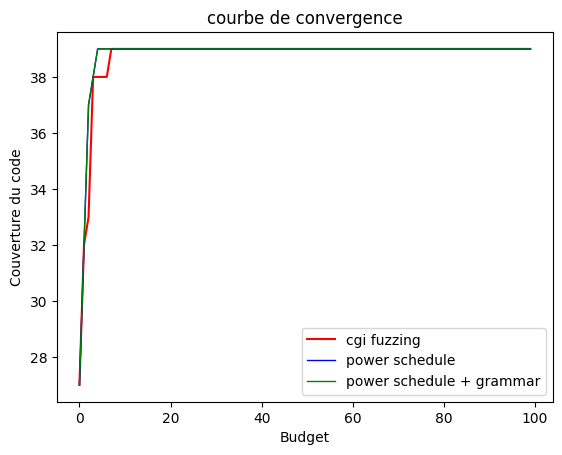

In [21]:
# Plotting the results : 
x = list(range(100))
plt.plot(x, cgi_simple_fuzzing, c='r', lw=1.5, label='cgi fuzzing')
plt.plot(x, cgi_power_schedule, c='b', lw=1, label='power schedule')
plt.plot(x, cgi_power_schedule_with_grammar, c='g', lw=1, label='power schedule + grammar')

plt.title("courbe de convergence")
plt.xlabel("Budget")
plt.ylabel("Couverture du code")
plt.legend()
plt.show()

In [42]:
# html treatment 
runs = 10
budget = 100

seed_1 = AbstractSeed("")
seed_2 = AbstractSeed("<html class='element'>Element</html>")
seed_3 = AbstractSeed("simple text")
seed_4 = AbstractSeed("html>Element</html")
seed_5 = AbstractSeed("<br/>")
seed_6 = AbstractSeed("<html style=background>test</html>")
seed_7 = AbstractSeed("<img al='backggs;><br/><other>")
seed_8 = AbstractSeed("<img al='backggs';;adj na><br/><other>")

seeds = [seed_1, seed_2, seed_3, seed_4, seed_5, seed_6, seed_7, seed_8]


letters = list(string.ascii_letters)
letters.extend(['1', '2', '3', '4', '5', '6', '7', '8', '9'])
gram = {
    '-start>': ['-html>'],
    '-html>': ['-open>-tag> -property>-close>-content>-opene>-tag>-close>', '-open>-selftag>-closee>'],
    '-tag>': ['-text>'],
    '-property>':['-nameproperty> = \'-propertyvalue>\'',''],
    '-selftag>': ['-letter>', '-letter>-selftag>'],
    '-content>': ['-text>', '-html>'],
    '-text>': ['-letter>', '-letter>-text>'],
    '-letter>': letters,
    '-nameproperty>':['-letter>', '-letter>-nameproperty>'],
    '-propertyvalue>':['-letter>', '-letter>-propertyvalue>'],
    '-open>': ['<'],
    '-close>': ['>'],
    '-opene>': ['</'],
    '-closee>': ['/>']
}

grammar = HtmlGrammar(gram)
power_schedule = AbstractPowerSchedule()

html_simple_fuzzing = fuzzing_html(seeds=seeds, runs = 20, budget=200)
html_power_schedule = fuzzing_schedule_html(seeds=seeds, runs = 20, budget = 200, power_schedule = power_schedule)
html_power_schedule_with_grammar = fuzzing_schedule_html(seeds=seeds, runs = 20, budget=200, power_schedule=power_schedule, grammar = grammar)


print(f'Convergence du simple fuzzing sur {max(html_simple_fuzzing)}')
print(f'Convergence en utilisant uniquement le powerschedule {max(html_power_schedule)}')
print(f'Convergence en utilisant le powerschedule et la grammaire {max(html_power_schedule_with_grammar)}')

Convergence du simple fuzzing sur 137.15
Convergence en utilisant uniquement le powerschedule 140.0
Convergence en utilisant le powerschedule et la grammaire 140.0


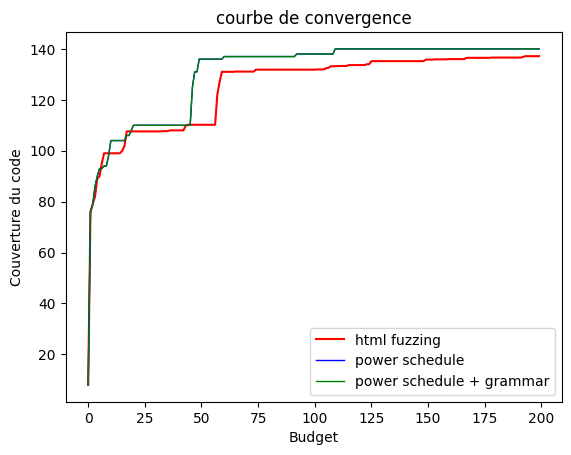

In [43]:
# Plotting the results : 
x = list(range(200))
plt.plot(x, html_simple_fuzzing, c='r', lw=1.5, label='html fuzzing')
plt.plot(x, html_power_schedule, c='b', lw=1, label='power schedule')
plt.plot(x, html_power_schedule_with_grammar, c='g', lw=1, label='power schedule + grammar')


plt.title("courbe de convergence")
plt.xlabel("Budget")
plt.ylabel("Couverture du code")
plt.legend()
plt.show()

In [34]:

seed_1 = AbstractSeed("www.google.com")
seed_2 = AbstractSeed("https://www.facebook.com/")
seed_3 = AbstractSeed("http://127.0.0.1:8080/index.html")
seed_4 = AbstractSeed("https://www.facebook.com")
seed_5 = AbstractSeed("https://www.facebook-com/")
seed_6 = AbstractSeed("http:/127.0.0.1:8080/index.htl")
seed_7 = AbstractSeed("http:/127..0.1:8080/index.htl")
seed_8 = AbstractSeed("http:/127.0.1:8080/index.htl")

seeds = [seed_1, seed_2, seed_3, seed_4, seed_5, seed_6, seed_7, seed_8]
# Grammar definition :
letters = list(string.ascii_letters)
numbers = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']
letters.extend(numbers)
gram = {
    '<start>':['<url>'],
    '<url>':['<first-part>www.<domain-name><other-part>',
             '<first-part><ip-address>:<port><other-part>'],
    '<first-part>':['http://', 'https://',''],
    '<domain-name>':['<text>.<extension>'],
    '<text>':['<letter><text>','<letter>'],
    '<letter>':letters,
    '<extension>':['<letter><extension>','<letter>'],
    '<other-part>':['/<text>','/<text><other-part>'],
    '<ip-address>':['<each-part>.<each-part>.<each-part>.<each-part>'],
    '<each-part>':['<digit>','<digit><digit>',
                   '1<digit><digit>','2<other-digits>'],
    '<port>':['<digit>','<digit><digit>','<digit><digit><digit>',
              '<digit><digit><digit><digit>','<digit><digit><digit><digit><digit>'],
    '<other-digits>':numbers[:5],
    '<digit>':numbers,
}

grammar = AbstractGrammar(gram)
power_schedule = AbstractPowerSchedule()

In [38]:

url_simple_fuzzing = fuzzing_url(seeds=seeds, runs = 20, budget=200)
url_power_schedule = fuzzing_schedule_url(seeds=seeds, runs = 20, budget = 200, power_schedule = power_schedule)
url_power_schedule_with_grammar = fuzzing_schedule_url(seeds=seeds, runs = 20, budget=200, power_schedule=power_schedule, grammar = grammar)


print(f'Convergence du simple fuzzing sur {max(url_simple_fuzzing)}')
print(f'Convergence en utilisant uniquement le powerschedule {max(url_power_schedule)}')
print(f'Convergence en utilisant le powerschedule et la grammaire {max(url_power_schedule_with_grammar)}')

Convergence du simple fuzzing sur 64.0
Convergence en utilisant uniquement le powerschedule 64.0
Convergence en utilisant le powerschedule et la grammaire 64.0


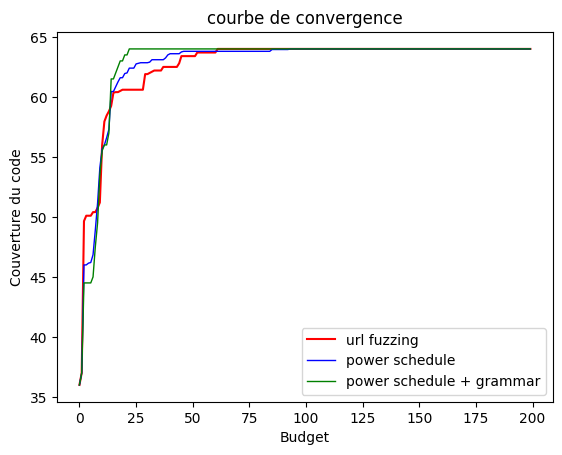

In [39]:
# Plotting the results : 
x = list(range(200))
plt.plot(x, url_simple_fuzzing, c='r', lw=1.5, label='url fuzzing')
plt.plot(x, url_power_schedule, c='b', lw=1, label='power schedule')
plt.plot(x, url_power_schedule_with_grammar, c='g', lw=1, label='power schedule + grammar')

plt.title("courbe de convergence")
plt.xlabel("Budget")
plt.ylabel("Couverture du code")
plt.legend()
plt.show()